In [37]:
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import statistics as stat

### Seeing the raw data

In [38]:
def reader(filename):
    global df
    df = pd.read_csv(filename)
    plt.figure(figsize=(15,3))
    plt.title("RAW Data")
    plt.xlabel("Time (millisecond)") 
    plt.ylabel("Sensor Value") 
    plt.plot(df.index, df["tap_data"])
    

### Filtering the tap data

In [39]:
def filter(threshold):

    temp = df["tap_data"]
    ll = []
    for data in temp:
        if data >threshold:
            ll.append(1)
        else :
            ll.append(0)

    df["binary_tap_data"] = ll

### Getting rid of the leading and trailing 0s 

In [40]:
def trimmer():
    global tap
    global time
    tap = df["binary_tap_data"]
    time = df["time_data"]

    first_one_index = next(i for i, x in enumerate(tap) if x == 1)

    last_one_index = len(tap) - 1 - next(i for i, x in enumerate(reversed(tap)) if x == 1)

    # Slice both lists to remove leading and trailing zeros
    tap = tap[first_one_index:last_one_index+1]
    time = time[first_one_index:last_one_index+1]

    plt.figure(figsize=(15,3)) 
    plt.title("Filtered Data")
    plt.xlabel("Time (millisecond)") 
    plt.ylabel("Toouch Sense") 
    plt.plot(time, tap)

### Calculating AT_20 metric

In [41]:
def at20_estimator():
    at_20 = []

    flag = 0

    for tt,tm in zip(tap,time):
        if tt == 1 and flag == 0:
            start_time = tm
            flag = 1
        if tt == 1 and flag == 1:
            end_time = tm
        if tt == 0 and flag == 1:
            flag = 0
            end_time = tm
            at_20.append(end_time-start_time)
        if tt == 0 and flag ==0:
            continue
    
    return at_20

### Calculating IS_20 metric

In [42]:
def is20_estimator():
    is_20 = []

    inverted_tap = [1 if x == 0 else 0 for x in tap]
    flag = 0

    for tt,tm in zip(inverted_tap,time):
        if tt == 1 and flag == 0:
            start_time = tm
            flag = 1
        if tt == 1 and flag == 1:
            end_time = tm
        if tt == 0 and flag == 1:
            flag = 0
            end_time = tm
            is_20.append(end_time-start_time)
        if tt == 0 and flag ==0:
            continue
        
    return is_20

### DRIVER

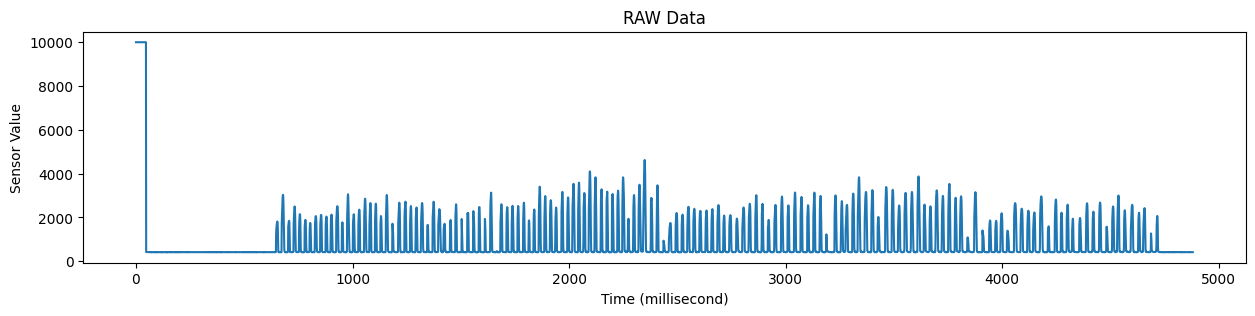

In [43]:
file = "s10_index_r.csv"
# file = "subj_1_data_index.csv"
reader(file)

KS20 = 146
median AT20 = 70.0
Standard Deviation of AT20 = 52.26269579492126

median IS20 = 107.0
Standard Deviation of IS20 = 281.27036098030237


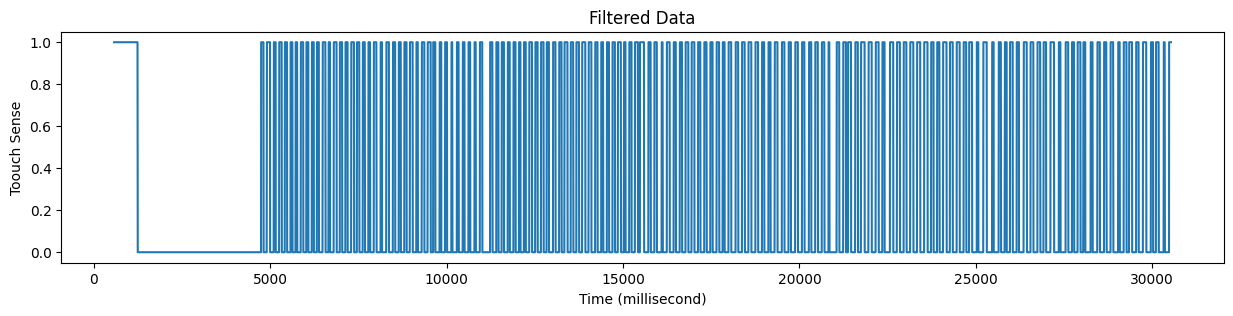

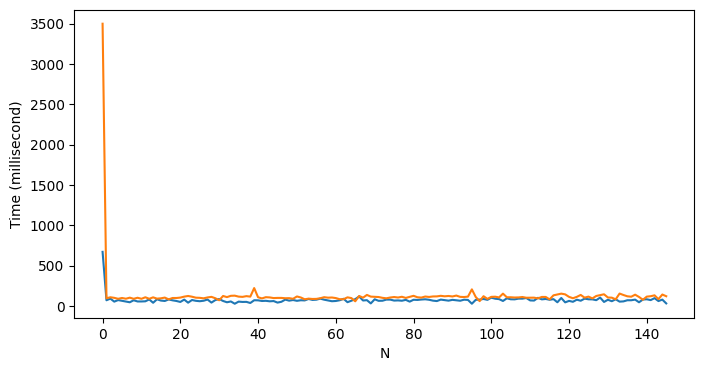

In [44]:
filter(500)
trimmer()

at_20 = at20_estimator()
is_20 = is20_estimator()

print("KS20 = " + str(len(at_20)))

print("median AT20 = " + str(stat.median(at_20)))
print("Standard Deviation of AT20 = " + str(stat.stdev(at_20)))

print("\nmedian IS20 = " + str(stat.median(is_20)))
print("Standard Deviation of IS20 = " + str(stat.stdev(is_20)))

plt.figure(figsize=(8,4))

plt.xlabel("N") 
plt.ylabel("Time (millisecond)") 
plt.plot(at_20)
plt.plot(is_20)

In [45]:
df = df.iloc[400:]

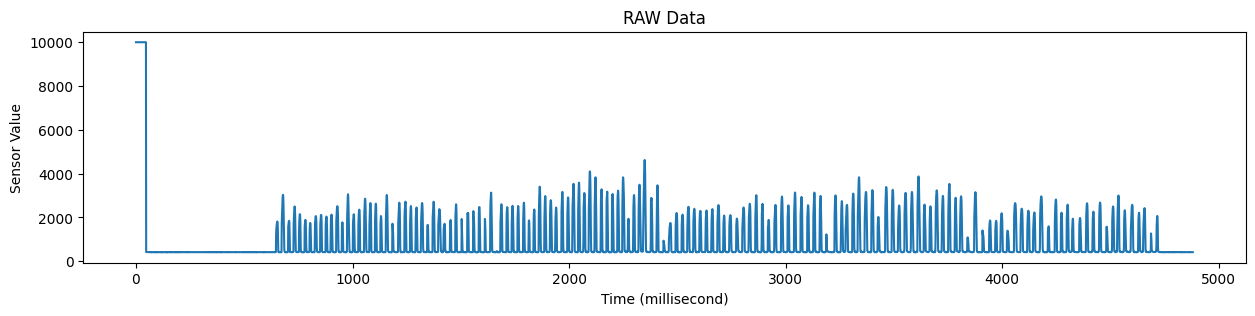

In [46]:
reader(file)